## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
df = pd.read_csv('data/human_body_temperature.csv')

In [19]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Question 1: Is the distribution of body temperatures normal?

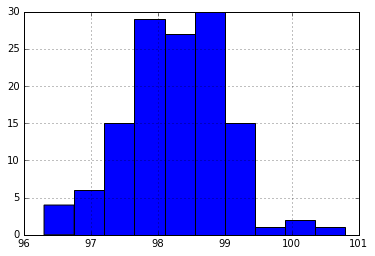

In [20]:
# First, a histogram of temperatures to get a visual starting place.
temps = df.temperature
temps.hist()

In [21]:
# Seems noramal enough, but I'm a skeptic. Better do a normalcy test.
stats.normaltest(temps)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

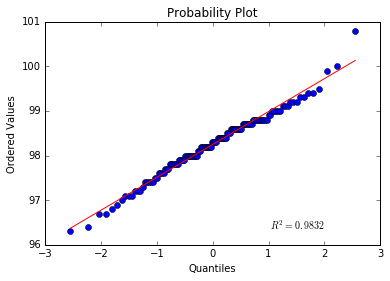

In [22]:
# The p-value is significant (>0.05), suggesting normalcy. For completeness, what does this look like on a regression line?
stats.probplot(temps, dist="norm", plot=plt)
plt.show()

## Answer: Based on the histogram, p-value > 0.05, and R-squared value close to 1, we can say the distribution is normal. 

# Question 2: Is the true population mean really 98.6 degrees F?

In [27]:
# H0: The population mean is 88.6 degrees F.
# H1: The population mean is not 98.6 degrees F.

# First, let's check sample size to see if the Central Limit Theorem applies here.
sample_size = len(temps)
sample_size

130

In [31]:
# There are >30 samples, so CLT applies. Given that, let's run a z-test.
# For this, the critical z-value is 1.96.
null_mean = 98.6
sample_mean = temps.mean()
sample_std = temps.std()

z_stat = (null_mean - sample_mean) / (sample_std / np.sqrt(sample_size))
z_stat

5.4548232923640789

In [25]:
# For the sake of completeness, I'll run a t-test as well:
stats.ttest_1samp(temps, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## Answer: Given a z-statistic of 5.4548 and t-statistic of the same magnitude, we reject the null hypothesis and can say with 95% confidence that the true population mean is not 98.6 degrees F.

# Question 3: At what temperature should we consider someone's temperature to be "abnormal"?

In [33]:
# "normal" is defined as within 95% CI, so critical z-value is 1.96.
# Since this matches the critical value from question 2, I'll re-use those values.
low_bound = sample_mean - (sample_std / np.sqrt(sample_size))
high_bound = sample_mean + (sample_std) / np.sqrt(sample_size)
print(low_bound, ',', high_bound)

98.1849263524 , 98.3135351861


## Answer: An "abnormal" temperature is anything below 98.2 degrees F, or anything above 98.3 degrees F.

# Question 4: Is there a significant difference between males and females in normal temperature?

In [36]:
# H0: The difference in means of male and female temperatures is 0.
# H1: The difference in means of male and female temperatures is not 0.

# First, I'll separate them out by gender and check the sample size for each.
male_temps = df[df.gender == 'M'].temperature
female_temps = df[df.gender == 'F'].temperature

print(len(male_temps),',', len(female_temps))

65 , 65


In [37]:
# Okay, so they're the same size. Let's run a quick test.
stats.ttest_ind(male_temps, female_temps)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

## Answer: Given a t-statistic of -2.2854 with a p-value of 2.39%, we can say there is a significant difference between the gender temperature and reject the null hypothesis.